In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# dependent libraries
from cv2 import cv2
import matplotlib.pyplot as plt

import utils

# Basic Theory

Here we use the curve fitting method (least-square) to predict the radius of the 3d sphere. The theoretical basis is as following:

If flatten each logitude of the sphere onto the 2d plane, then the flattened image is a circle, theoretically. The perimeter of each circle is:

$R \times (\pi-\theta) \times 2\pi$

In reality, the sphere is cut into some lobes, and then each lobe is flattened onto the 2d plane and the lobe is distorted. Due to the connection of the tissue, the lobe is integrated. If we omit the little distortion of each lobe, then the perimeter of the visible flattened gappy circle is the same with the perimeter of the circle when it is still a sphere, and its value is:

$R \times sin(\theta) \times 2\pi$

Therefore, the length of the gaps in the flattened 2d image of each circle is:

$gap = R \times (\pi - \theta - sin(\theta)) \times 2\pi$

Since we know that the length of the logitude of the 3d sphere or the raidus of the circle in the flattened 2d image is

$l = R \times (\pi-\theta)$

Then substitute $\theta$ in the $gap$ function

$gap = 2\pi \times l - 2\pi \times R \times sin(\pi - \frac{l}{R})$

We could get the $gap$ and $l$ from the image. If we set the $R$ as the arguments to be fitted, then use the curve_fit from scipy could solve the problem.

To estimate more accurately, we introduce an error item,

$gap = 2\pi \times l - 2\pi \times [(R - \frac{k}{2\pi}) \times (sin(\pi - \frac{l}{R}))]$

We will estimate the sphere radius based on one previously estimated error item $k$ in the above equation.

## 1. Annotation Example

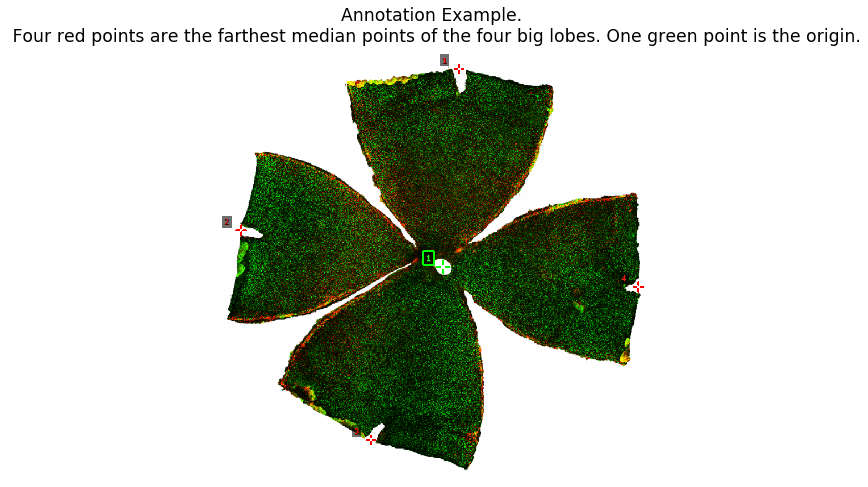

In [3]:
# show the annotation example
def show_ann_ex():
	fname = './res/ann_example.png'
	img = cv2.imread(fname)[:,:,::-1]
	fig = plt.figure(figsize=(8,8))
	plt.imshow(img)
	plt.title('Annotation Example. \n Four red points are the farthest median points of the four big lobes. One green point is the origin.', size='xx-large')
	plt.axis('off')
	return

show_ann_ex()

## 2. Definition of angle $\theta$

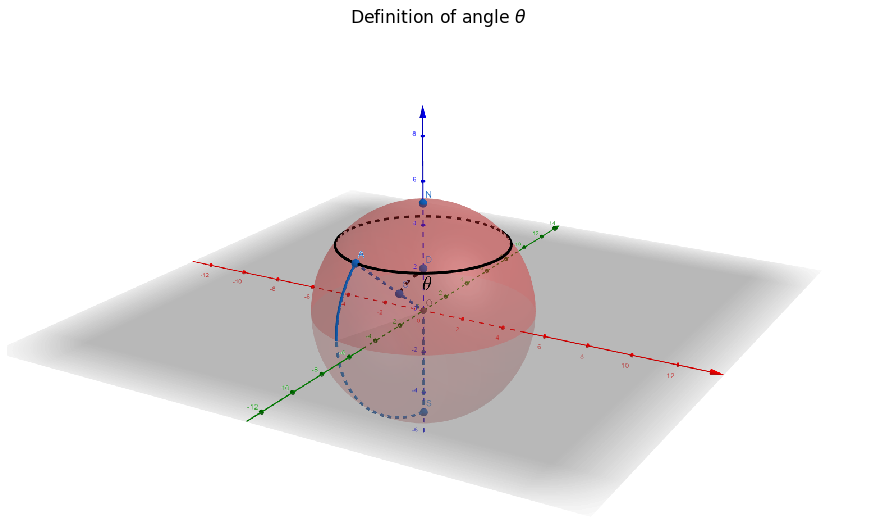

In [4]:
# show the definition of the angle theta
def show_theta_def():
	fname = './res/sphere_theta.png'
	img = cv2.imread(fname)[:,:,::-1]
	fig = plt.figure(figsize=(16,9))
	plt.imshow(img)
	plt.title('Definition of angle $\\theta$', size='xx-large')
	plt.axis('off')
	return

show_theta_def()

## 3. Estimate the error item $k$

1/1     sample_01: 
Fitted (k/2pi) by all points is: 0.05256 mm (standard deviation: 0.00223 mm), Fitted (k/2pi) by middle points is: 0.03499 mm (standard deviation: 0.00172 mm)
Complete.



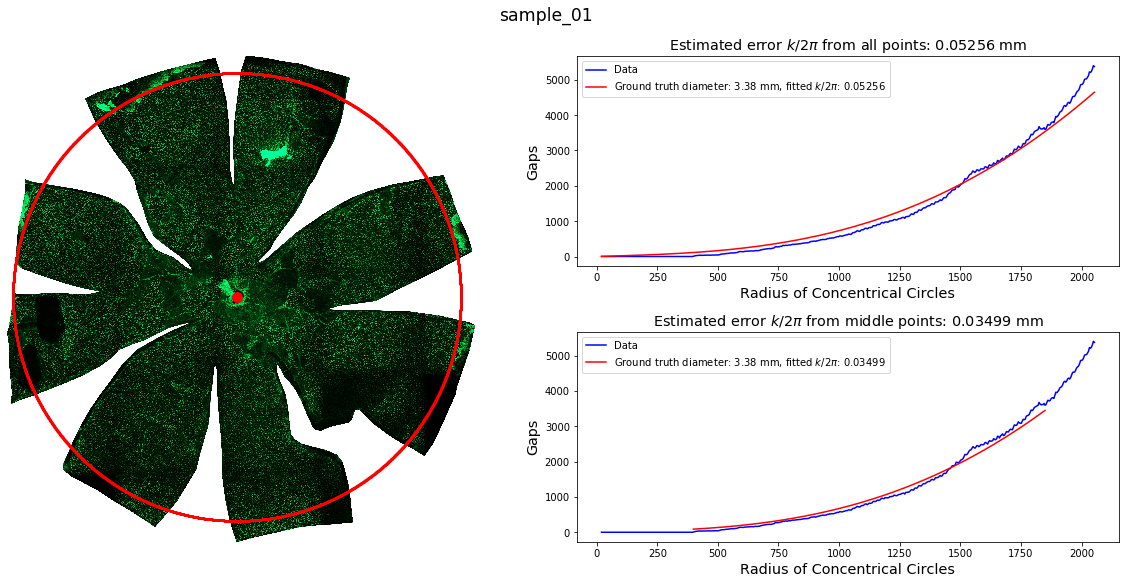

In [5]:
gt_file = './data/gt_radius.csv'
res_file = './results/k_estimates.csv'
utils.estimate_paras_k(gt_file, res_file, utils.func_k, draw_fit_curve=True)

## 4. Estimate the radius based on the estimated $k$

1/1: sample_02
Complete.



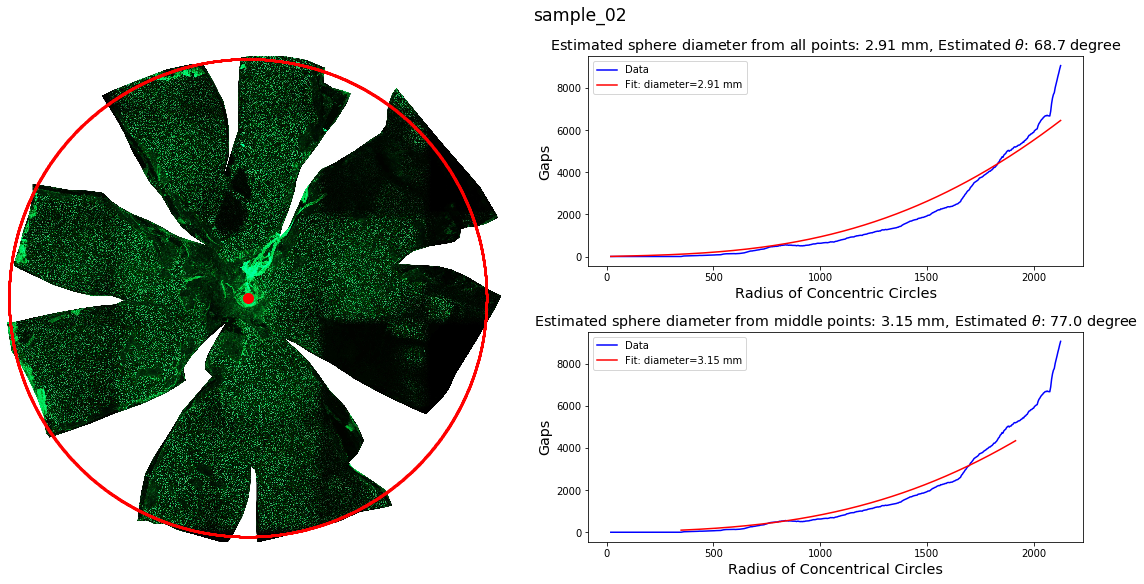

In [6]:
img_dir = './data/test'
res_file = './results/r_theta_estimates.csv'
k_df_file = './results/k_estimates.csv'
k,_,_,_ = utils.get_k_value(k_df_file)
um_per_pixel=1.24
utils.estimate_paras_r(img_dir, res_file, k, utils.func_r, um_per_pixel, draw_fit_curve=True, save_fig_file=None)